## INTRODUCTION

A heart attack occurs when an artery supplying your heart with blood and oxygen becomes blocked. Fatty deposits build up over time, forming plaques in your heart's arteries. If a plaque ruptures, a blood clot can form and block your arteries, causing a heart attack.

In [2]:
#IMPORTING THE LIBRARIES
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#LOADING THE DATASET
data = pd.read_csv("heart_attacks.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA-Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#CHECKING FOR THE MISSING VALUES
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#FINDING OUT THE COLUMNS
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

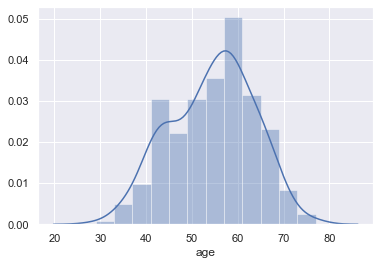

In [10]:
#PLOTTING THE AGE FEATURE
sns.distplot(data['age'])

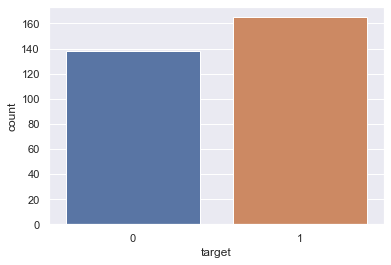

In [11]:
#PLOTTING THE TARGET VALUE
sns.countplot(data['target'])

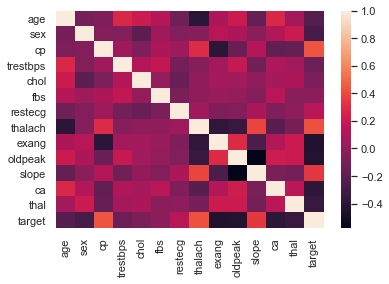

In [12]:
#PLOTTING THE HEAT MAP
g=data.corr()
df=g.index
g=sns.heatmap(data[df].corr())

## MODELING AND PREDICTING

In [13]:
#SELECTING DEPENDENT AND INDEPENDENT FEATURES
X = data.drop("target", axis=1)
y = data["target"]

In [14]:
##SPLITTING THE DATASET INTO TRAIN & TEST 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
## import the model
## we'll be using the random forest classidier 

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

1.0

In [16]:
print(classification_report(y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [17]:
print(confusion_matrix(y_test, Y_prediction))

[[23  4]
 [ 4 30]]


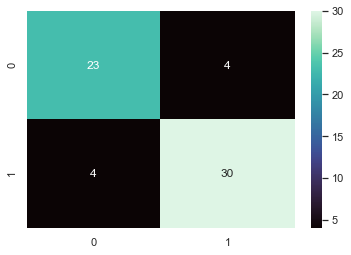

In [18]:
## plot the confusion matrix in a heat map
sns.heatmap(confusion_matrix(y_test, Y_prediction), annot=True, cmap="mako")

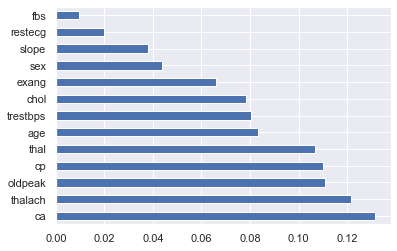

In [19]:
## feature importance
feat_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')